<a href="https://colab.research.google.com/github/Kristyyy/Machine-Learning-Project/blob/master/Kristy_LogisticRegression2_when_customers_are_going_to_transact_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Author: Fang Jung(Kristy) Lin 
## Purpose: Logistic Regression Analysis - when customers are going to transact

# Import necessary packages

In [0]:
import numpy as np
import pandas as pd
import random
import os

from matplotlib import pyplot as plt
import pylab as pl
from matplotlib.ticker import PercentFormatter
from pylab import rcParams
import seaborn as sns

import statsmodels.api as sm
from sklearn import datasets
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LassoCV, LassoLarsCV, LassoLarsIC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Purpose for the analysis

* Use logistic regression to predict when customers are going to transact 
* Determine the causes for a transaction

# Part1. Data Acquisition and Exploration

### Data Acquisition

The actual path to downloadable CSV is: https://docs.google.com/spreadsheets/d/e/2PACX-1vRk3BvuLxQIuEf83HB8Xu-GK5EESgREILi4whh7X0ahIZppn4zbPLlYWe96m6W24IWKVMOANzBY3ZXI/pub?gid=1878290979&single=true&output=csv


Read data from Google sheet and explore the data frame

In [0]:
data_path = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vRk3BvuLxQIuEf83HB8Xu-GK5EESgREILi4whh7X0ahIZppn4zbPLlYWe96m6W24IWKVMOANzBY3ZXI/pub?gid=1878290979&single=true&output=csv'
my_df = pd.read_csv(data_path)

my_df.head(3)

,row,transaction,salary_usd,is_male,is_married,is_college,is_professional,is_senior,is_employed,is_single_income,children_present,is_renter,lives_in_house,is_english_primary_language,previously_disney_customer,previous_streaming_service_customer
0,653,0,25000,1,0,0,0,0,0,1,0,1,0,1,0,0
1,546,0,7000,0,0,0,0,0,0,1,1,1,1,1,0,0
2,463,0,25000,1,0,0,1,0,0,1,1,1,0,1,1,0


### Interpret the data

In [0]:
list(my_df)

['row',
 'transaction',
 'salary_usd',
 'is_male',
 'is_married',
 'is_college',
 'is_professional',
 'is_senior',
 'is_employed',
 'is_single_income',
 'children_present',
 'is_renter',
 'lives_in_house',
 'is_english_primary_language',
 'previously_disney_customer',
 'previous_streaming_service_customer']

Dataset interpretion:

*   row: Random number assigned to the customer
*   transaction: Whether the customer do the purchase (0,1)
*   salary_usd: Salary of the customer
*   is_male: Whether the customer is male (0,1)
*   is_married: Whether the customer got married (0,1)
*   is_college: Whether the customer has college degree (0,1)
*   is_professional: Whether the customer is professional (0,1)
*   is_senior: Whether the customer is a senior (0,1)
*   is_employed: Whether the customer is employed (0,1)
*   is_single_income: Whether the customer is single income (0,1)
*   children_present: Whether the purchase is the present for children (0,1)
*   is_renter: Whether the customer lives in the rent place (0,1)
*   lives_in_house: Whether the customer lives in house (0,1)
*   is_english_primary_language: Whether English is the primary language of the customer (0,1)
*   previously_disney_customer: Whether the customer has purchased behavior in disney before (0,1)
*   previous_streaming_service_customer: Whether the customer the streaming service customer before (0,1)







### Data preprocessing

Check both the datatypes and if there are missing values

In [0]:
print('Datatype:\n', my_df.dtypes)
print('Missing values:\n', my_df.isnull().any())

Datatype:
 row                                    int64
transaction                            int64
salary_usd                             int64
is_male                                int64
is_married                             int64
is_college                             int64
is_professional                        int64
is_senior                              int64
is_employed                            int64
is_single_income                       int64
children_present                       int64
is_renter                              int64
lives_in_house                         int64
is_english_primary_language            int64
previously_disney_customer             int64
previous_streaming_service_customer    int64
dtype: object
Missing values:
 row                                    False
transaction                            False
salary_usd                             False
is_male                                False
is_married                             False
is_college   

Remove unnecessary column

In [0]:
my_df = my_df.drop(columns = ['row'])
my_df.head(1)

,transaction,salary_usd,is_male,is_married,is_college,is_professional,is_senior,is_employed,is_single_income,children_present,is_renter,lives_in_house,is_english_primary_language,previously_disney_customer,previous_streaming_service_customer
0,0,25000,1,0,0,0,0,0,1,0,1,0,1,0,0


### Explore the relation among transaction and other variables

In [0]:
my_df.describe()

,transaction,salary_usd,is_male,is_married,is_college,is_professional,is_senior,is_employed,is_single_income,children_present,is_renter,lives_in_house,is_english_primary_language,previously_disney_customer,previous_streaming_service_customer
count,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000
mean,0.186139,58223.762376,0.443564,0.366337,0.308911,0.352475,0.063366,0.029703,0.762376,0.364356,0.605941,0.673267,0.900990,0.075248,0.079208
std,0.389604,39098.058320,0.497297,0.482281,0.462502,0.478215,0.243862,0.169935,0.426049,0.481726,0.489132,0.469484,0.298971,0.264052,0.270331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,25000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,0.000000,55000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
75%,0.000000,86000.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,124000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### From the table above, we can get some useful information.

*   Approximately 19% of the customers have transaction, which is quite small.
*   The standard deviation of the salary is quite huge. It may have relation to the low transaction, we need to dig more about it.
*   Almost all of customers' primary language is English, it may not be the factor of low transaction.

### Explore the data for only those who done the transaction

In [0]:
tran_df = my_df[my_df['transaction']==1]
tran_df.describe()

,transaction,salary_usd,is_male,is_married,is_college,is_professional,is_senior,is_employed,is_single_income,children_present,is_renter,lives_in_house,is_english_primary_language,previously_disney_customer,previous_streaming_service_customer
count,94.0,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.0,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.00000
mean,1.0,113308.510638,0.351064,0.765957,0.531915,0.606383,0.042553,0.0,0.468085,0.372340,0.212766,0.882979,0.978723,0.159574,0.12766
std,0.0,15861.650917,0.479862,0.425669,0.501656,0.491171,0.202930,0.0,0.501656,0.486021,0.411458,0.323169,0.145079,0.368175,0.33550
min,1.0,58000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,1.0,106250.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.00000
50%,1.0,124000.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.00000
75%,1.0,124000.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.0,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.00000
max,1.0,124000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


#### The table shows some information about the customers who done the transaction.

*   The mean salary for the customers who done the transaction is much higher than the overall mean salary, which means that the level of salary has relation with transaction.

*   High propotion of the customers who done the transaction lives in the house and are not a renter, which means that they may also have higher salary so they have more chance to transact. 

*   High propotion of the customers who done the transaction are college and professional.


*   Other factors seem quite balanced.


### Visualize the data to find out how differently is the salary of two groups (transact and not transact) distributed 

Text(0.5, 1.0, 'KDE of two groups salary')

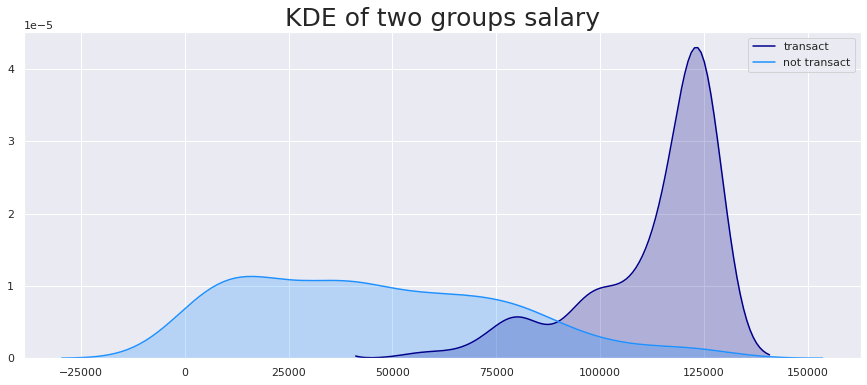

In [0]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,6))
asx = my_df[my_df['transaction']==1]
ax = sns.kdeplot(data=asx['salary_usd'],color='darkblue', shade=True, label='transact')
asd = my_df[my_df['transaction']==0]
ax = sns.kdeplot(data=asd['salary_usd'],color='dodgerblue', shade=True, label='not transact')
ax.set_title('KDE of two groups salary', fontsize=25)

#### From the KDE plot, we can find:

*   Customers who done the transaction have much higher salary. 
*   We can confirm that salary will influence customers' transaction, the higher salary they have, the higher chance they spend the money.



### Correlation between all variables

Plot the heat map to show correlation between each variable

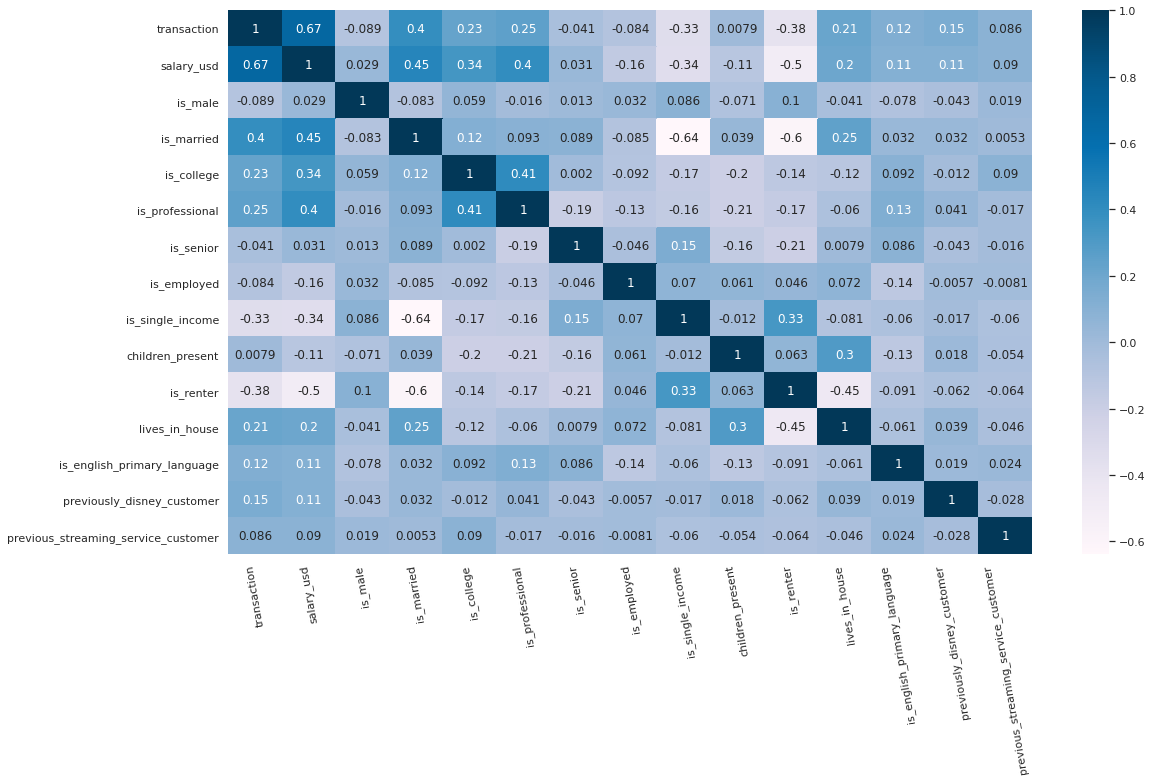

In [0]:
sns.set(font_scale=1)
plt.figure(figsize=(18,10))
sns.heatmap(my_df.corr(), annot=True, cmap = 'PuBu')
plt.xticks(rotation=100)
plt.show()

#### From the heat map above, we can understand the relation among variables.

*  Transaction can be mainly influenced by

     --> salary_usd (same as our exploration before), is_married, is_single_income, is_renter, is_college, is_professional, lives_in_house

  *  Among them, salary is the most critical factor for the transaction. The second factor is marriage status. 
  
  *  From the heat map, we can also find that salary can be influenced by other factors (ex. is_college, is_married...). If these factors can lead to the high salary, it means that these factors can also lead to the higer opportunity for customers to conduct the transaction. 
  
  *  If the customers get married, they will have higher chance to conduct the transaction. We still need to explore more about it.

*  Below is my assumption...will explore more later!
     
     1. If the customer is married, he/she will have more than one income and have a higher chance to live in house (not a renter). They may have children and need to buy the presents, so they have higher chance to transact.

     2. If the customer is professional, he/she may be college and may have a higher chance to have a higher salary. Hence, he/she will have higher chance to transact.


### Explore the relation of married customers with other variables

From the previous analysis, we found that most transact customers are those who got married. Let's find out whether they have higher salary.

In [0]:
my_df_mar = my_df[my_df['is_married'] == 1]
print('Average salary of married customer: ', my_df_mar['salary_usd'].mean())

my_df_not_mar = my_df[my_df['is_married'] == 0]
print('Average salary of not married customer: ', my_df_not_mar['salary_usd'].mean())

Average salary of married customer:  81551.35135135135
Average salary of not married customer:  44737.5


* is_married vs salary_usd

   We can find that customers who got married have higher salary.


Let's find out is their salary from single income

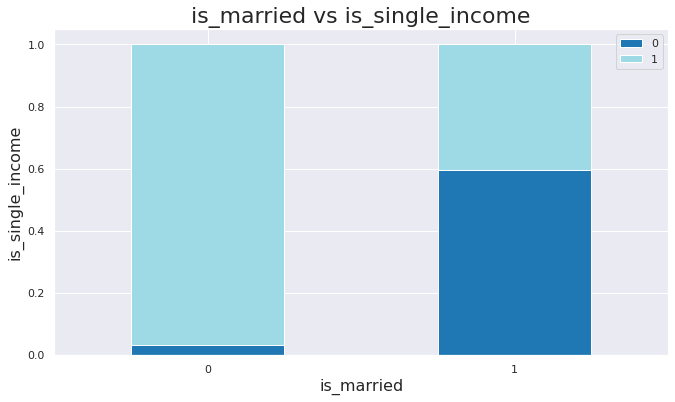

In [0]:
table = pd.crosstab(my_df.is_married, my_df.is_single_income)
table.div(table.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, colormap = 'tab20', figsize=(11,6))
plt.title('is_married vs is_single_income', fontsize=22)
pl.xticks(rotation=360)
plt.xlabel('is_married', fontsize=16)
plt.ylabel('is_single_income', fontsize=16)
plt.legend(loc=1)

* is_married vs is_single_income

   More than a half number of married customers have more than one income.


Let's explore whether they live in the house

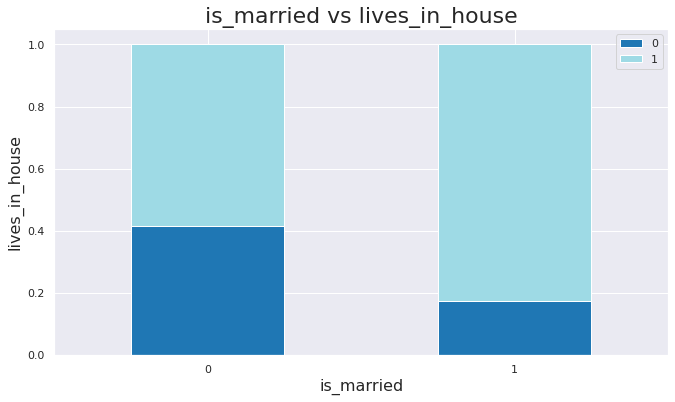

In [0]:
table = pd.crosstab(my_df.is_married, my_df.lives_in_house)
table.div(table.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, colormap = 'tab20', figsize=(11,6))
plt.title('is_married vs lives_in_house', fontsize=22)
pl.xticks(rotation=360)
plt.xlabel('is_married', fontsize=16)
plt.ylabel('lives_in_house', fontsize=16)
plt.legend(loc=1)

*  is_married vs lives_in_house

  Most married customers live in the house



Let's find out are their house rented?

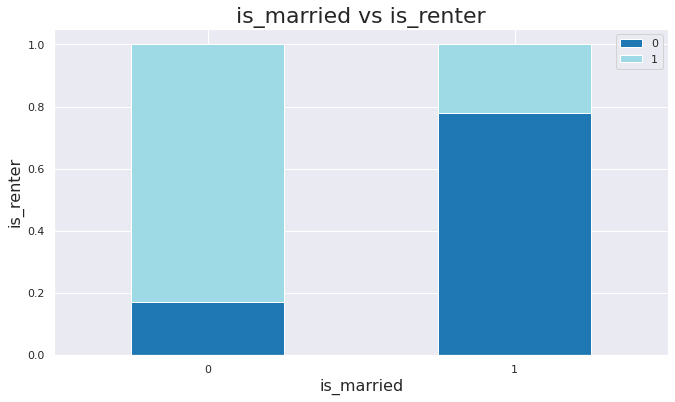

In [0]:
table = pd.crosstab(my_df.is_married, my_df.is_renter)
table.div(table.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, colormap = 'tab20', figsize=(11,6))
plt.title('is_married vs is_renter', fontsize=22)
pl.xticks(rotation=360)
plt.xlabel('is_married', fontsize=16)
plt.ylabel('is_renter', fontsize=16)
plt.legend(loc=1)

*   is_married vs is_renter

    It seems that married customers live in their own house and have a higher economic standard

### Summary above exploration 

Customers who got married have higher salary and living standard, which verify that they are the main group for transaction.






### Explore the relation of is_professional with other variables

In my previous assumption, I think if the customer is professional, he/she may be college and have a higher salary

In [0]:
my_df_col = my_df[my_df['is_professional'] == 1]
print('Average salary of professional customer: ', my_df_col['salary_usd'].mean())

my_df_not_col = my_df[my_df['is_professional'] == 0]
print('Average salary of not professional customer: ', my_df_not_col['salary_usd'].mean())

Average salary of professional customer:  79342.69662921349
Average salary of not professional customer:  46727.82874617737


*  is_professional vs salary_usd

   We can find that customers who are professional have a higher salary.


Let's find out if they are college

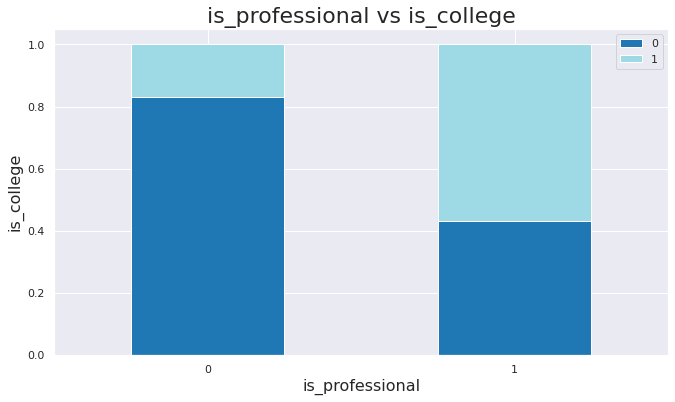

In [0]:
table = pd.crosstab(my_df.is_professional, my_df.is_college)
table.div(table.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, colormap = 'tab20', figsize=(11,6))
plt.title('is_professional vs is_college', fontsize=22)
pl.xticks(rotation=360)
plt.xlabel('is_professional', fontsize=16)
plt.ylabel('is_college', fontsize=16)
plt.legend(loc=1)

*  is_professional vs is_college

    The propotion of is_college is higher when the customer is_professional

### Summary above exploration 

Customers who is_professional have higher salary and have more chance to be a_college

### Choosing variables for prediction

From the analysis above, I choose below five variables as my prediction of transaction.

*   salary_usd
*   is_married
*   is_single_income
*   is_renter
*   is_professional


Let's take a look on the regression result of 'salary_usd', 'is_married', 'is_single_income', 'is_renter', 'is_professional'

In [0]:
X_cols = ['salary_usd', 'is_married', 'is_single_income', 'is_renter', 'is_professional']

X = my_df[X_cols].values

data_length = len(my_df)
column_length = len(my_df[X_cols].columns)

X = X.reshape(data_length,column_length)
y = my_df['transaction'].values
y = y.reshape(data_length,1)

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

lin_reg= LinearRegression()
lin_reg.fit(X_train, y_train)

listing_y_pred = lin_reg.predict(X_test)

print((pd.DataFrame(listing_y_pred, columns={'y_prediction'}).head(5)))
print()

print('Intercept:', float(lin_reg.intercept_))

coeff_df = pd.DataFrame(lin_reg.coef_)
coeff_df.columns = X_cols
print(coeff_df)
print()

print("Mean Squared Error (MSE):%.2f" % mean_squared_error(y_test, listing_y_pred))

print('Variance Score (R^2):%.2f' % r2_score(y_test, listing_y_pred))

   y_prediction
0      0.123246
1     -0.102776
2     -0.196731
3     -0.052667
4     -0.165413

Intercept: -0.2309944985091546
   salary_usd  is_married  is_single_income  is_renter  is_professional
0    0.000006    0.112106         -0.001039   0.022775        -0.011998

Mean Squared Error (MSE):0.08
Variance Score (R^2):0.44


### Outcome of regression result

From the MSE we can find that the model looks good. However, the variance score is too low, the model may be underfitted. Let's use logistic regression to explore more!

# Part2. Logistic Regression

### Data preprocessing

In [0]:
X = my_df[['salary_usd', 'is_married', 'is_single_income', 'is_renter', 'is_professional']]
y = my_df['transaction']

### Using sklearn's implementation of logistic regression

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

Initialize Logistic Regressor and fit the model

In [0]:
model = LogisticRegression()
model.fit(X_train, y_train.values.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Score the model

In [0]:
model.score(X_test, y_test)

0.937007874015748

In [0]:
X_test

,salary_usd,is_married,is_single_income,is_renter,is_professional
90,55000,0,1,1,1
97,17000,0,1,1,0
477,2000,0,1,1,0
340,25000,0,1,1,0
395,7000,0,1,1,0
...,...,...,...,...,...
134,12000,0,1,1,0
225,50000,0,1,0,0
402,98000,0,1,0,1
493,124000,1,1,0,0


### Get predictions for the test set. Each value corresponds to transaction outcome of 0 (No) or 1 (Yes)

In [0]:
pred = model.predict(X_test)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0])

### Take a look on MSE

In [0]:
mean_squared_error(y_test, pred)

0.06299212598425197

### Take a look at the probabilities of each record.

The structure below has two data points per record.

The first data point contains the probability of this record NOT transaction
The second data point contains the probability of this record POSITIVELY transaction

In [0]:
model.predict_proba(X_test)

array([[9.88171731e-01, 1.18282686e-02],
       [9.98885474e-01, 1.11452564e-03],
       [9.99608959e-01, 3.91041159e-04],
       [9.98052437e-01, 1.94756282e-03],
       [9.99445529e-01, 5.54470960e-04],
       [9.59598566e-01, 4.04014342e-02],
       [9.94595833e-01, 5.40416743e-03],
       [6.00379066e-01, 3.99620934e-01],
       [9.87589077e-01, 1.24109226e-02],
       [9.97041143e-01, 2.95885722e-03],
       [9.99030691e-01, 9.69309027e-04],
       [3.77900584e-01, 6.22099416e-01],
       [9.97240278e-01, 2.75972159e-03],
       [9.81097366e-01, 1.89026337e-02],
       [9.98804910e-01, 1.19508970e-03],
       [9.83261494e-01, 1.67385057e-02],
       [8.29855647e-01, 1.70144353e-01],
       [2.98631297e-01, 7.01368703e-01],
       [9.83308102e-01, 1.66918977e-02],
       [9.82490114e-01, 1.75098861e-02],
       [9.99405425e-01, 5.94575278e-04],
       [9.53693851e-01, 4.63061493e-02],
       [9.99030691e-01, 9.69309027e-04],
       [9.86596372e-01, 1.34036284e-02],
       [9.974333

### Take a look at the actuals, predictions, and probabilities

In [0]:
prediction_df = pd.DataFrame(model.predict(X_test), columns = {'Prediction'}).set_index([pd.Index(X_test.index)])
probability_df = pd.DataFrame(model.predict_proba(X_test)).set_index([pd.Index(X_test.index)])
all_together_df = X_test.join(y_test).join(prediction_df).join(probability_df)
all_together_df.head(3)

,salary_usd,is_married,is_single_income,is_renter,is_professional,transaction,Prediction,0,1
90,55000,0,1,1,1,0,0,0.988172,0.011828
97,17000,0,1,1,0,0,0,0.998885,0.001115
477,2000,0,1,1,0,0,0,0.999609,0.000391


### Summary the performance of the prediction

*  The score of the prediction is quite high 93.7%
*  The mean square error of the model is 0.06, which is quite low and lower than the MSE of linear regression
*  The probability of the transaction prediction is convincing. It's close to the real world situation
*  Logistic regression approach is a good way for this analysis!

Let's predict more to see the result!



### Use the model to predict transaction for arbitray values

#### Let's take a look at customer who...

* has high salary, is_married, is professional, has more than one income, is not a renter 

* has low salary, not married, not professional, has only one income, is a renter 





In [0]:
sat_values1 = pd.DataFrame(data = {'salary_usd': [120000, 58000], 'is_married': [1, 0], 'is_single_income': [0, 1], 'is_renter': [0, 1], 'is_professional': [1, 0]})
sat_values1.join(pd.DataFrame(model.predict(sat_values1), columns = {'Prediction'}).set_index([pd.Index(sat_values1.index)]))

,salary_usd,is_married,is_single_income,is_renter,is_professional,Prediction
0,120000,1,0,0,1,1
1,58000,0,1,1,0,0


#### Let's take a look at customer who...

*   has high salary, is not married, is not professional, has only one income, is a renter

*   has low salary, is married, is professional, more than one income, not a renter

*   has low salary, is married, is not professional, has only one income, is a renter

In [0]:
sat_values2 = pd.DataFrame(data = {'salary_usd': [120000, 58000, 58000], 'is_married': [0, 1, 1], 'is_single_income': [1, 0, 1], 'is_renter': [1, 0, 1], 'is_professional': [0, 1, 0]})
sat_values2.join(pd.DataFrame(model.predict(sat_values2), columns = {'Prediction'}).set_index([pd.Index(sat_values2.index)]))

,salary_usd,is_married,is_single_income,is_renter,is_professional,Prediction
0,120000,0,1,1,0,1
1,58000,1,0,0,1,0
2,58000,1,1,1,0,0


### Summary

From the prediction above, we find that...

1.  Customer with high salary will conduct the transaction, even though he/ she is not married, is not professional, has only one income, and is a renter.

    --> We can conclude that salary is definitely the most critical factor to predict the transaction behavior.

2.  It's no doubt that customer with low salary and is not married will not conduct the transaction

    --> Corresponding to our exploration

3.  Although the customer is married, if he/she has low salary, he/she will not conduct the transaction.

    --> Again, salary is the most critical factor. Corresponding to our exploration.

## How would the above influence company strategy to attract the customers for further transaction?


Take a look on all together dataframe

In [0]:
prediction_df = pd.DataFrame(model.predict(X_test), columns = {'Prediction'}).set_index([pd.Index(X_test.index)])
probability_df = pd.DataFrame(model.predict_proba(X_test)).set_index([pd.Index(X_test.index)])
all_together_df = X_test.join(y_test).join(prediction_df).join(probability_df)
all_together_df.head(3)

,salary_usd,is_married,is_single_income,is_renter,is_professional,transaction,Prediction,0,1
90,55000,0,1,1,1,0,0,0.988172,0.011828
97,17000,0,1,1,0,0,0,0.998885,0.001115
477,2000,0,1,1,0,0,0,0.999609,0.000391


### Plot the result of customer salary

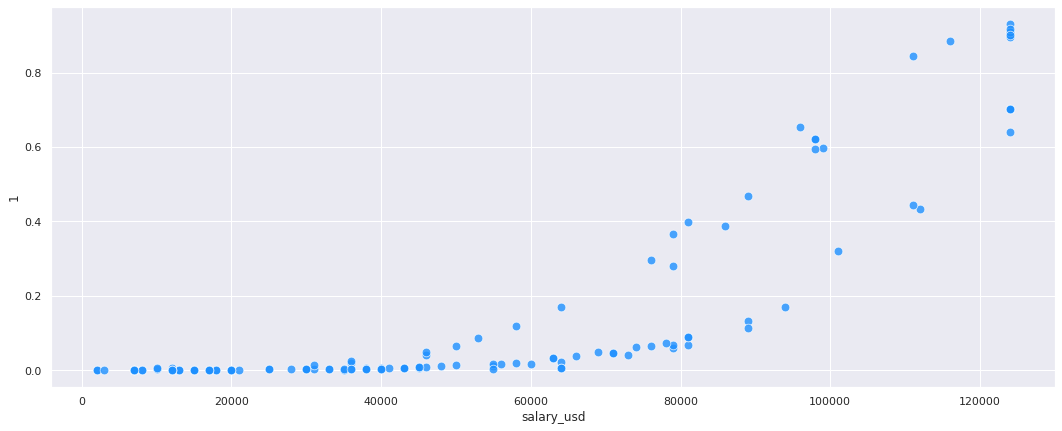

In [0]:
sns.set_style('darkgrid')
plt.figure(figsize=(18,7))
ax = sns.scatterplot(x = 'salary_usd', y = 1, data = all_together_df, s = 75, color = 'dodgerblue', alpha = 0.8)

### Relation between customer salary and transaction

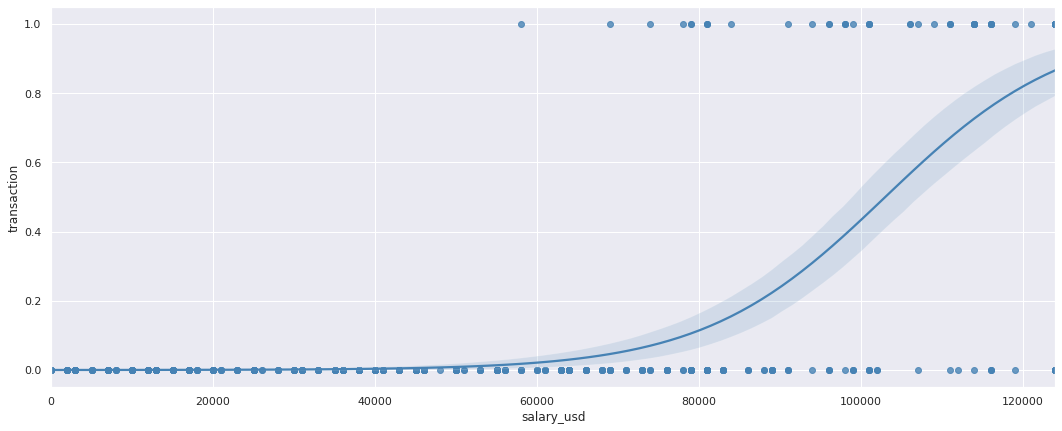

In [0]:
sns.set_style('darkgrid')
plt.figure(figsize=(18,7))
sns.regplot(x = 'salary_usd', y = 'transaction', data = my_df, logistic = True, color = 'steelblue') 

### Plot the result of customer marriage status

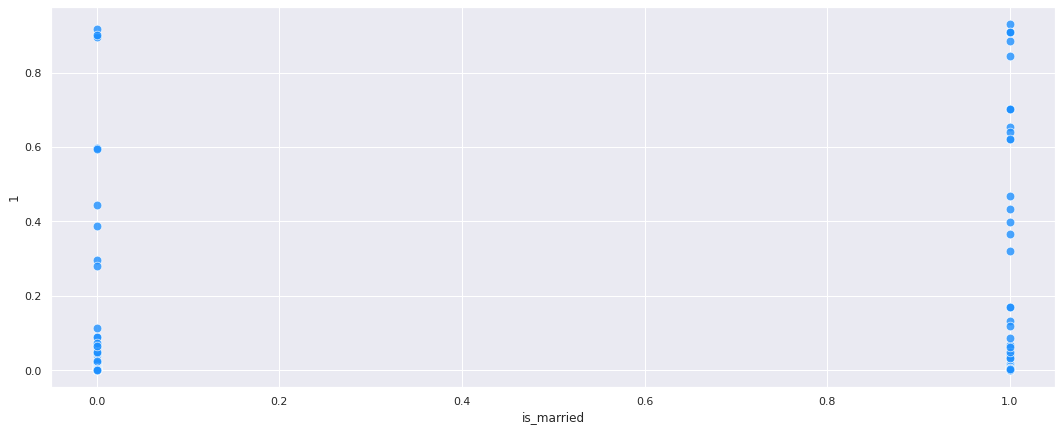

In [0]:
sns.set_style('darkgrid')
plt.figure(figsize=(18,7))
ax = sns.scatterplot(x = 'is_married', y = 1, data = all_together_df, s = 75, color = 'dodgerblue', alpha = 0.8)

### Relation between customer is_married and transaction

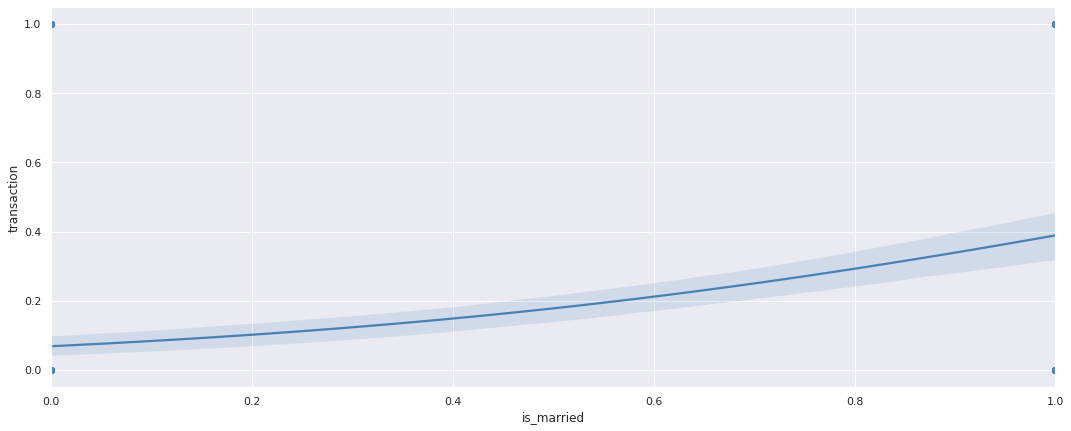

In [0]:
sns.set_style('darkgrid')
plt.figure(figsize=(18,7))
sns.regplot(x = 'is_married', y = 'transaction', data = my_df, logistic = True, color = 'steelblue')

# Conclusion

If the company hope to attract more customers to conduct the transaction, I have some recommandation from the result of my analysis.

1. From the analysis, it shows many times that the higher salary customers have more chance to conduct the transaction. Hence, there are two ways to deal with this situation

    *   Try to attract more rich people to visit. By holding some special campaigns that can attract upper class visitors.
    *   Lower the product price. The product sold in the store maybe too expensive, so few people can buy it. If the store hope more people come in can spend the money, one of the best way is to lower the price.

2.  Also, the people who got married have more chance to conduct the transaction. They may have children and will buy the presents for them. Hence, it will be good if the company can attract more 'family' to visit. Maybe it can launch family coupon or family activities to attract family.